
#                      Deep Learning Fundamentals - Logistic Regression

# Task 1: Introduction

In [1]:
import random
import numpy as np
import warnings
import helpers.plt, helpers.dataset
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Libraries imported')

F:\CONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\CONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\CONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\CONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

Libraries imported


# Task 2: Hyperparameters

In [2]:
lr = 0.3
batch_size = 300
iterations = 40

# Task 3: Dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = helpers.dataset.get_data()

Loading data..
11493376/11490434 [==============================] - 2s 0us/step
Done.


In [4]:
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (12665, 28, 28)
Shape of Y_train: (12665,)
Shape of X_test: (2115, 28, 28)
Shape of Y_test: (2115,)


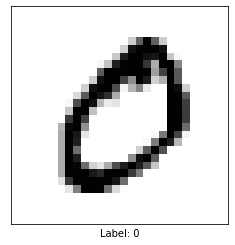

In [5]:
helpers.plt.show_example(X_train[0], Y_train[0])

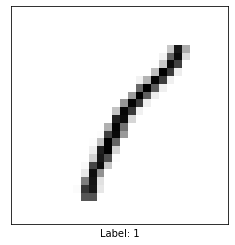

In [6]:
helpers.plt.show_example(X_train[-1], Y_train[-1])

# Task 4: A Mini Batch of Examples

X_batch shape (1, 784)


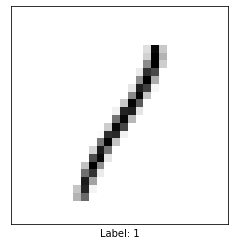

In [7]:
X_batch , Y_batch = helpers.dataset.get_random_batch(X_train, Y_train, 1)
print("X_batch shape", X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])

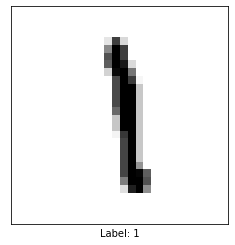

In [11]:
X_batch , Y_batch = helpers.dataset.get_random_batch(X_test, Y_test, 1)
#print("X_batch shape", X_batch.shape)
helpers.plt.show_example(X_batch[0], Y_batch[0])

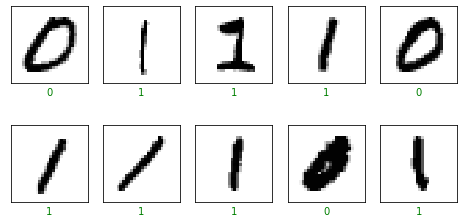

In [8]:
X_batch , Y_batch = helpers.dataset.get_random_batch(X_train, Y_train,10)
helpers.plt.show_ten_examples(X_batch, Y_batch, Y_batch)

# Task 5: Create Model

A logistic model is simply a multi variable linear equation which gives a binary output. The pixel values of our input images are going to be the input features - the independent variables that form the logistic regression equation. And the class label - either 0 or 1 in our case, is the output y.

\begin{equation}
z = b + w_1x_1 + w_2x_2 + ... + w_N * x_N
\end{equation}

\begin{equation}
y = \sigma(z)
\end{equation}

To simplify, we can use vectorized represenation where X is the feature matrix and W is the weight matrix:

\begin{equation}
y = \sigma(W^T.X + b)
\end{equation}

In [9]:
class LogisticModel:
    def __init__(self, num_features):
        # Your code here
        self.W = np.reshape(np.random.randn((num_features)),(num_features, 1))
        self.b = np.zeros((1,1))
        self.num_features = num_features
        self.losses = []
        self.accuracies = []
        
    def summary(self):
        print('=================================')
        print('Number of features:', self.num_features)
        print('Shape of weights:', self.W.shape)
        print('Shape of biases:', self.b.shape)
        print('=================================')
        
# Your code here
model = LogisticModel(num_features=784)
model.summary()

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)


# Task 5: Forward Pass

For a single training example, the loss should be:

\begin{equation}
L(y, \hat{y}) = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))
\end{equation}

In [10]:
class LogisticModel(LogisticModel):
    def _forward_pass(self, X, Y=None):
        # Your code here
        batch_size = X.shape[0]
        Z = np.dot(X,self.W) + self.b
        A = 1./(1. + np.exp(-Z))
        loss = float(1e6)
        if Y is not None:
            loss = -1 * np.sum(np.dot(np.transpose(Y), np.log(A)) + \
                        np.matmul(np.transpose(1-Y), np.log(1-A)))
            loss /= batch_size
            return A, loss

# Task 6: Backward Pass

In [11]:
class LogisticModel(LogisticModel):
    def _backward_pass(self, A, X, Y):
        # Your code here
        batch_size = X.shape[0]
        dZ = A - Y
        dW = np.dot(np.transpose(X), dZ)/ batch_size
        db = np.sum(dZ) / batch_size 
        return dW, db

# Task 7: Update Parameters

In [12]:
class LogisticModel(LogisticModel):
    def _update_params(self, dW, db, lr):
        # Your code here
        self.W -= lr*dW
        self.b -= lr*db
        

# Task 8: Check Model Performance

In [13]:
class LogisticModel(LogisticModel):
    def predict(self, X, Y=None):
        # Your code here
        A, loss = self._forward_pass(X, Y)
        Y_hat = A > 0.5
        return np.squeeze(Y_hat), loss
    
    def evaluate(self, X, Y):
        # Your code here
        Y_hat , loss = self.predict(X,Y)
        accuracy = np.sum(Y_hat == np.squeeze(Y)) / X.shape[0]
        return accuracy , loss

In [14]:
model = LogisticModel(784)
model.summary()

X,Y = helpers.dataset.get_random_batch(X_test, Y_test,batch_size)
acc , loss = model.evaluate(X,Y)
print("Untrained model accuracy :{} , loss: {}".format(acc, loss))

Number of features: 784
Shape of weights: (784, 1)
Shape of biases: (1, 1)
Untrained model accuracy :0.54 , loss: 2.9268599934595696


# Task 9: Training Loop

In [16]:
class LogisticModel(LogisticModel):
    def train(self, batch_size, get_batch, lr, iterations, X_train, Y_train, X_test, Y_test):
        # Your code here
        print("Training...")
        self.accuracies = []
        self.losses = []
        for i in range(iterations):
            X, Y = get_batch(X_train, Y_train, batch_size)
            A , _ = self._forward_pass(X,Y)
            dW , db = self._backward_pass(A,X,Y)
            self._update_params(dW , db , lr)
            
            X,Y = get_batch(X_test,Y_test,batch_size)
            val_acc , val_loss = self.evaluate(X,Y)
            self.accuracies.append(val_acc)
            self.losses.append(val_loss)
            
            print("iter :{}, val acc: {:.3f}, val loss: {:.3f}".format(i,val_acc,val_loss))
        print("Finish training")    

# Task 10: Training the Model

In [17]:
model = LogisticModel(784)
X,Y = helpers.dataset.get_random_batch(X_test,Y_test,batch_size)
print("b4 : ", model.evaluate(X,Y))

model.train(batch_size, helpers.dataset.get_random_batch, lr, iterations, X_train, Y_train, X_test, Y_test)

print("after :", model.evaluate(X,Y))

b4 :  (0.3233333333333333, 4.008902410826258)
Training...
iter :0, val acc: 0.480, val loss: 2.799
iter :1, val acc: 0.557, val loss: 1.906
iter :2, val acc: 0.693, val loss: 1.278
iter :3, val acc: 0.733, val loss: 1.049
iter :4, val acc: 0.790, val loss: 0.762
iter :5, val acc: 0.837, val loss: 0.565
iter :6, val acc: 0.837, val loss: 0.612
iter :7, val acc: 0.927, val loss: 0.296
iter :8, val acc: 0.923, val loss: 0.233
iter :9, val acc: 0.893, val loss: 0.315
iter :10, val acc: 0.917, val loss: 0.276
iter :11, val acc: 0.917, val loss: 0.316
iter :12, val acc: 0.950, val loss: 0.113
iter :13, val acc: 0.930, val loss: 0.203
iter :14, val acc: 0.957, val loss: 0.101
iter :15, val acc: 0.950, val loss: 0.158
iter :16, val acc: 0.973, val loss: 0.105
iter :17, val acc: 0.920, val loss: 0.252
iter :18, val acc: 0.960, val loss: 0.178
iter :19, val acc: 0.963, val loss: 0.112
iter :20, val acc: 0.973, val loss: 0.106
iter :21, val acc: 0.967, val loss: 0.151
iter :22, val acc: 0.990, va

# Task 11: Display the Results

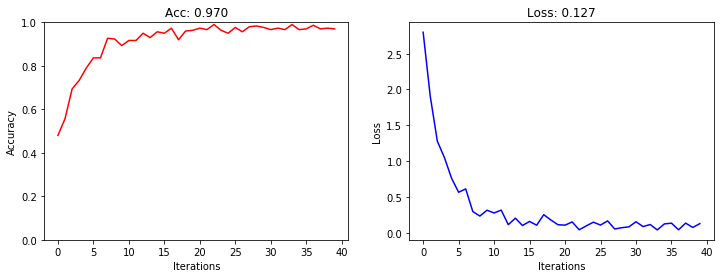

In [18]:
helpers.plt.plot_metrics(model)

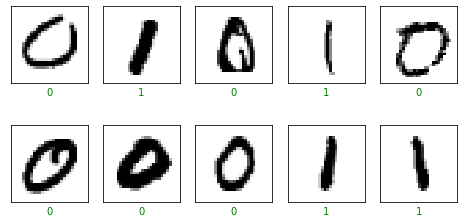

In [19]:
preds, _ = model.predict(X,Y)
helpers.plt.show_ten_examples(X,Y, preds)